**Bank Customer Churn Prediction**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

In [4]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

!pip install colorama

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

In [5]:
train_data = pd.read_csv("/content/Churn_Modelling.csv")
test_data = pd.read_csv("/content/Churn_Modelling.csv")
sample_submission = pd.read_csv("/content/Churn_Modelling.csv")

origional_data = pd.read_csv("/content/Churn_Modelling.csv")

In [6]:
train_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
train_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [8]:
test_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
test_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [11]:
origional_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
origional_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


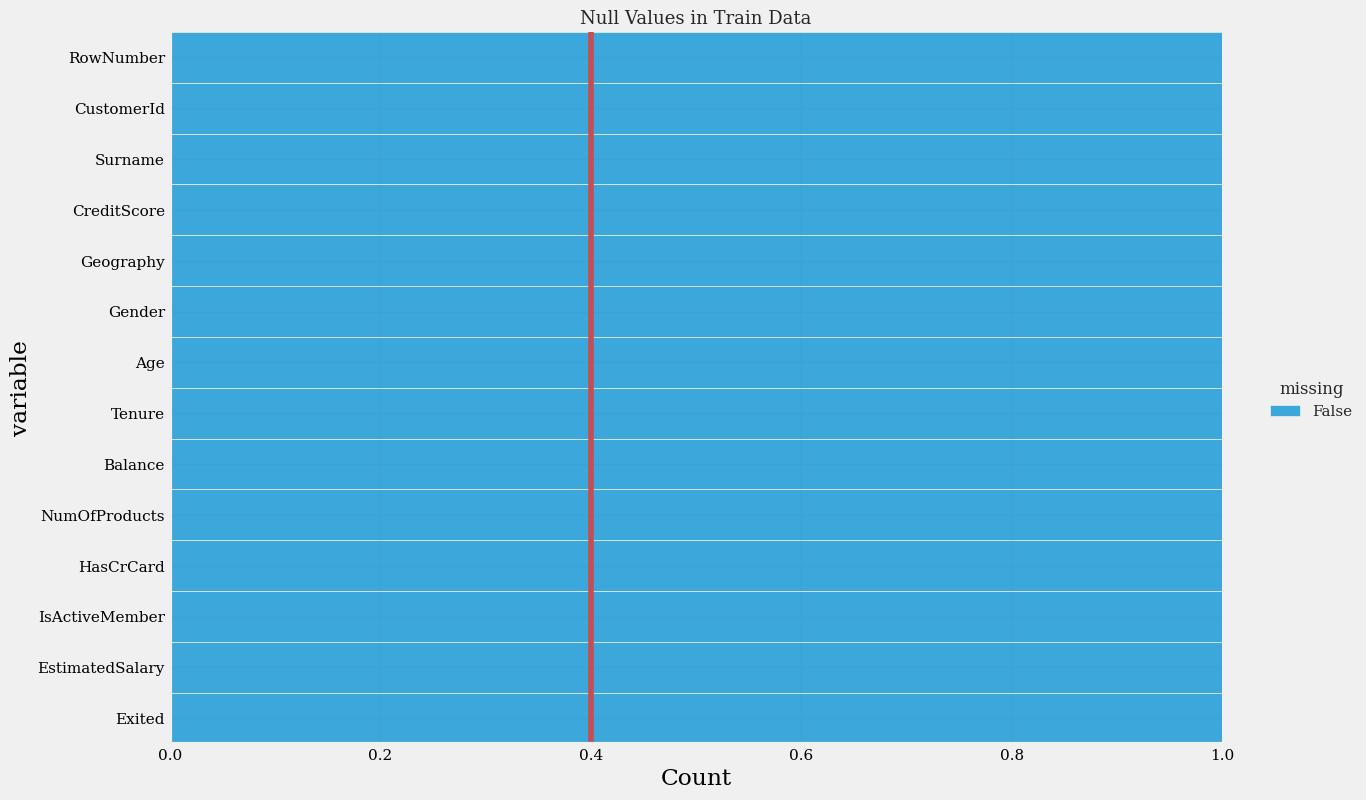

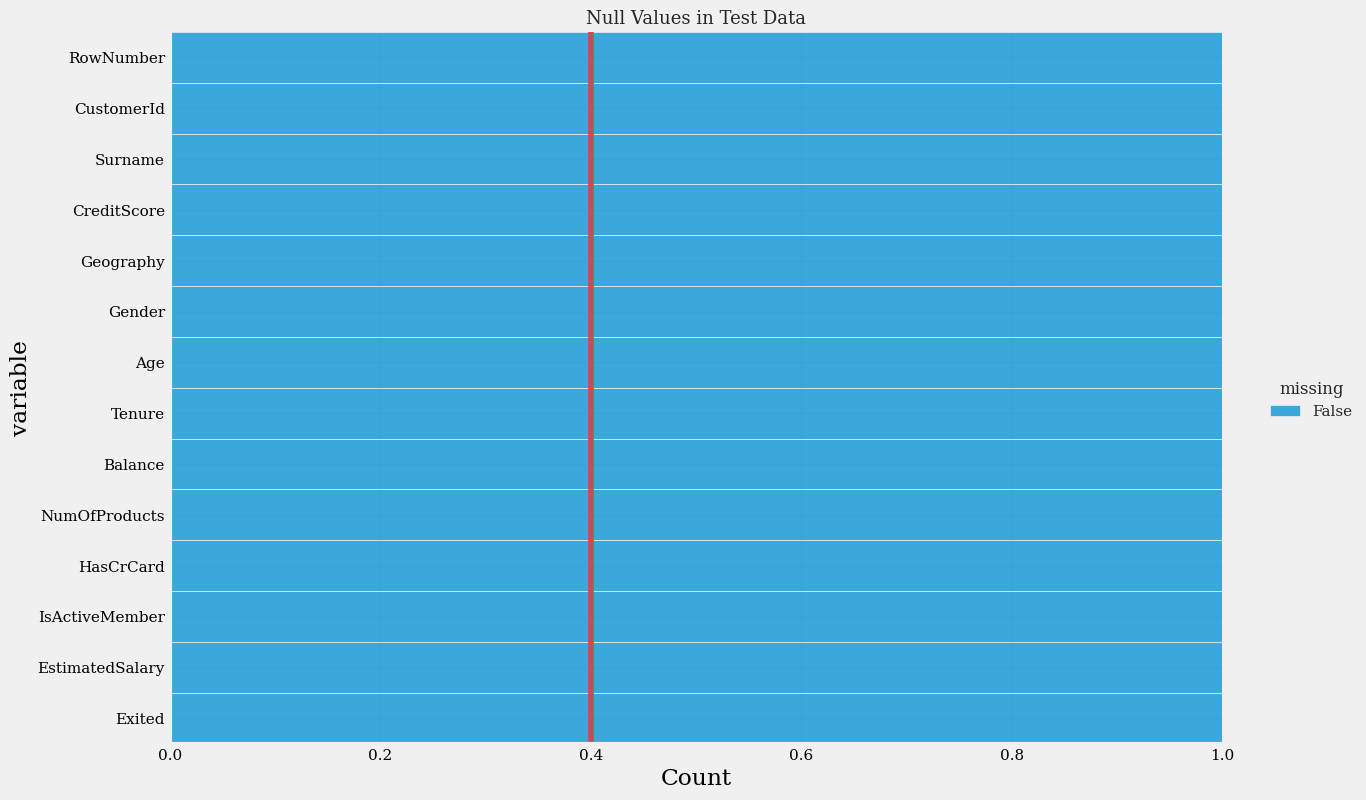

In [13]:
sns.displot(data=train_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()

# -------------------------

sns.displot(data=test_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Test Data', fontsize=13)
plt.show()

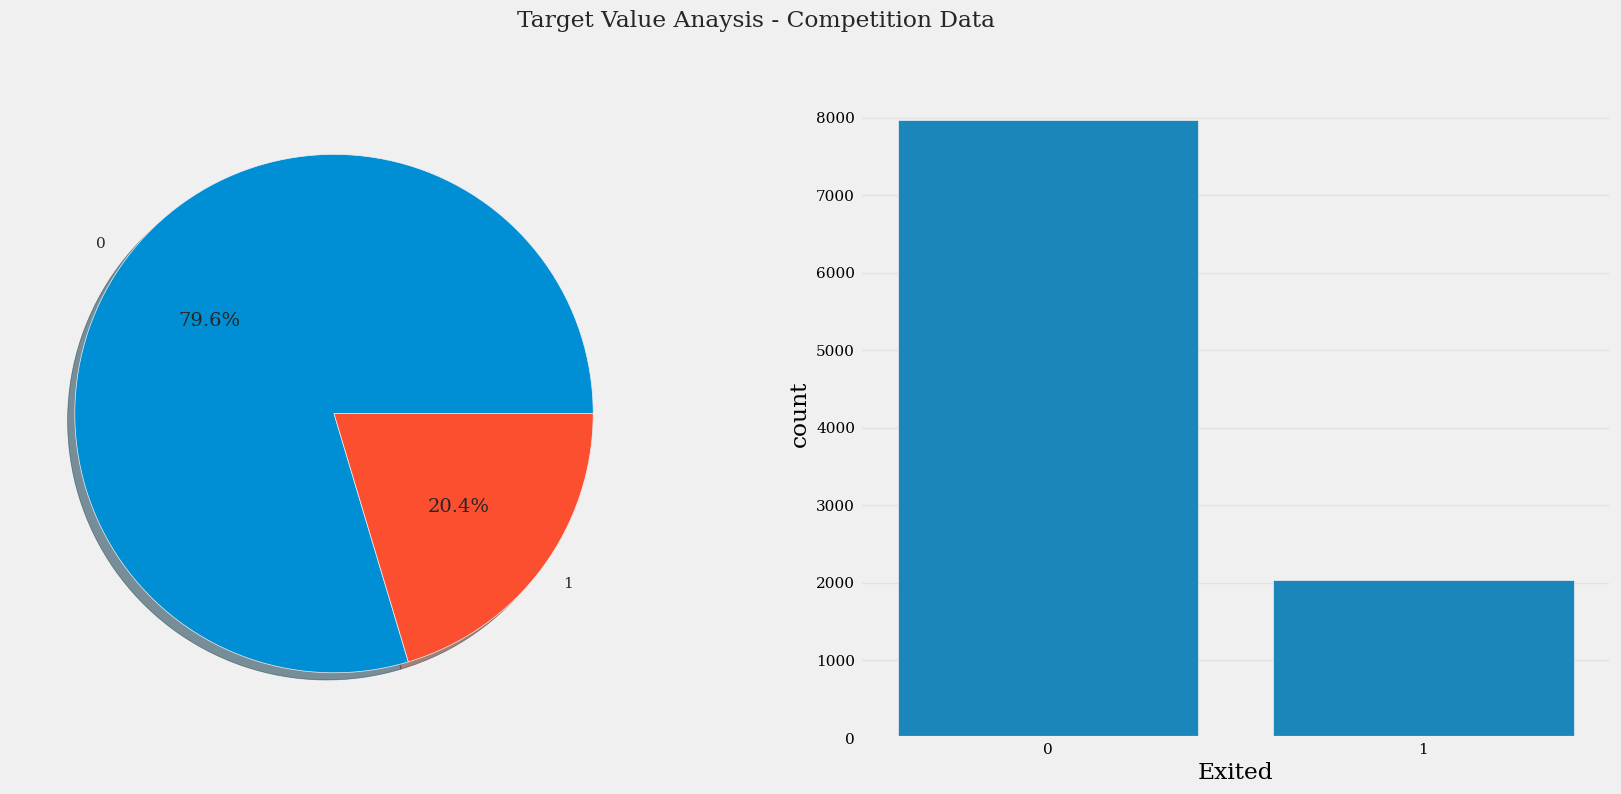

In [14]:
f,ax=plt.subplots(1,2,figsize=(19,8))
train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=train_data,ax=ax[1])
# ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Competition Data')
plt.show()

In [15]:
# Unique value counts for each column
unique_counts = train_data.nunique()

# Threshold to distinguish continuous and categorical
threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'outcome' from categorical since it's our target variable
if 'outcome' in categorical_vars:
    categorical_vars.remove('outcome')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

# print(f"Categorical Variables: {categorical_vars}")
# print(f"Continousl/Numerical Variables: {continuous_vars}")

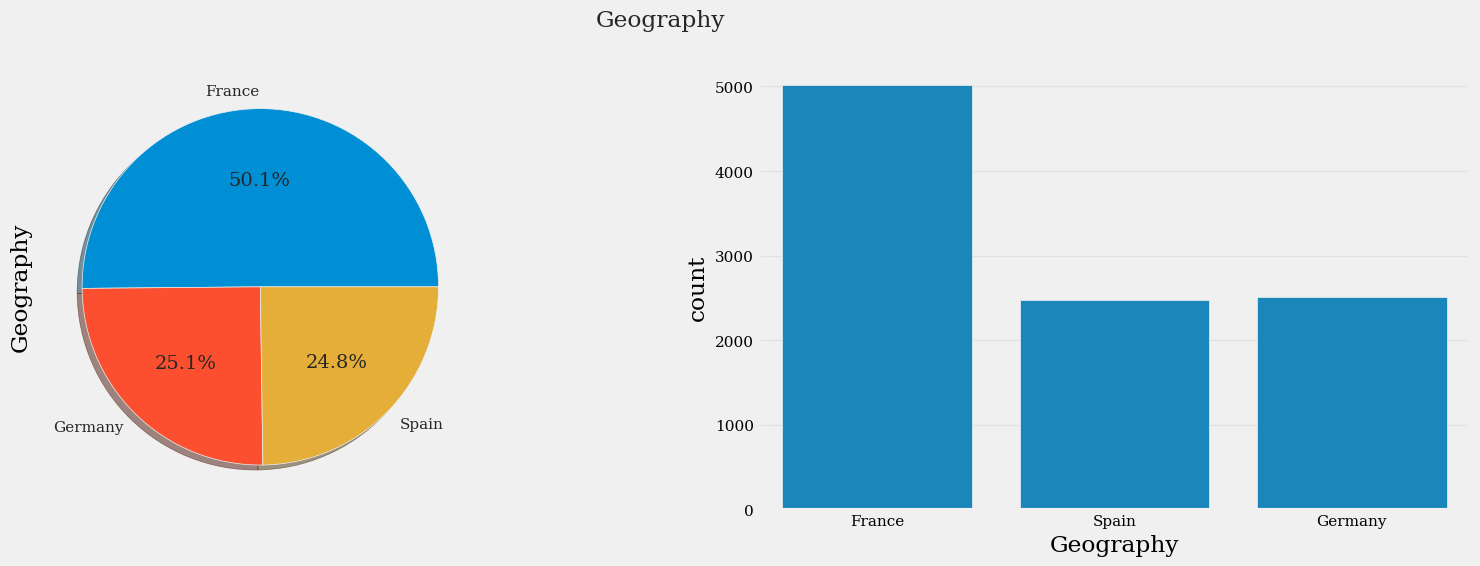

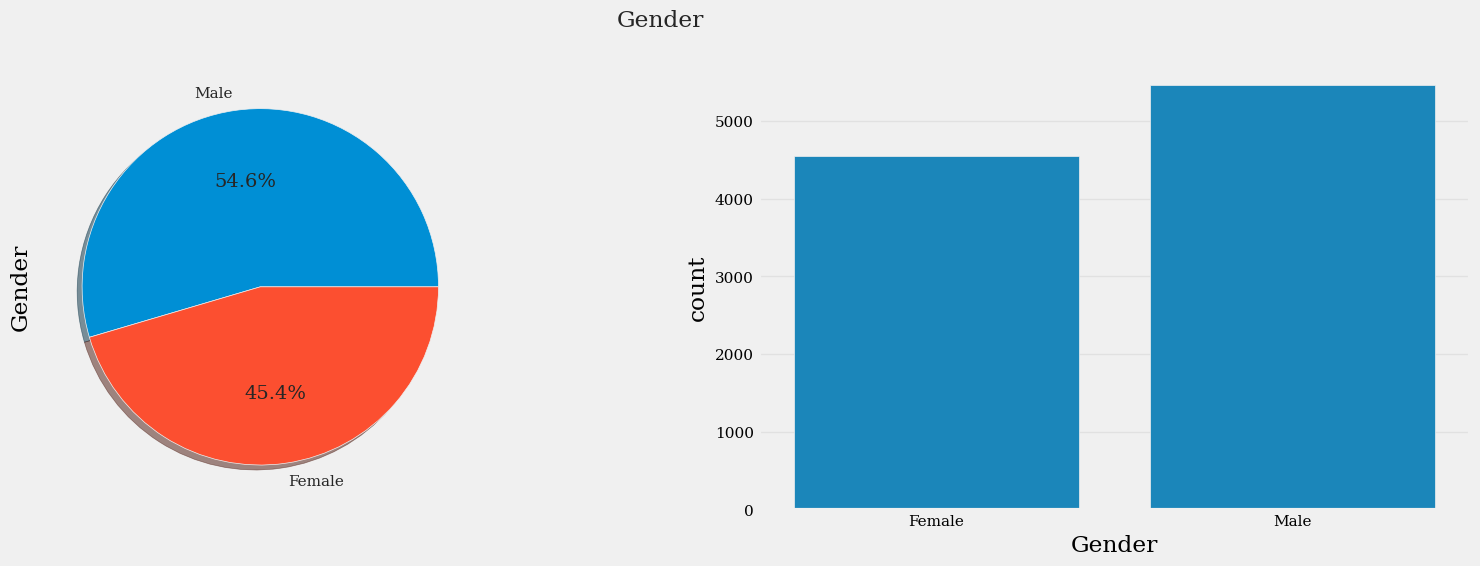

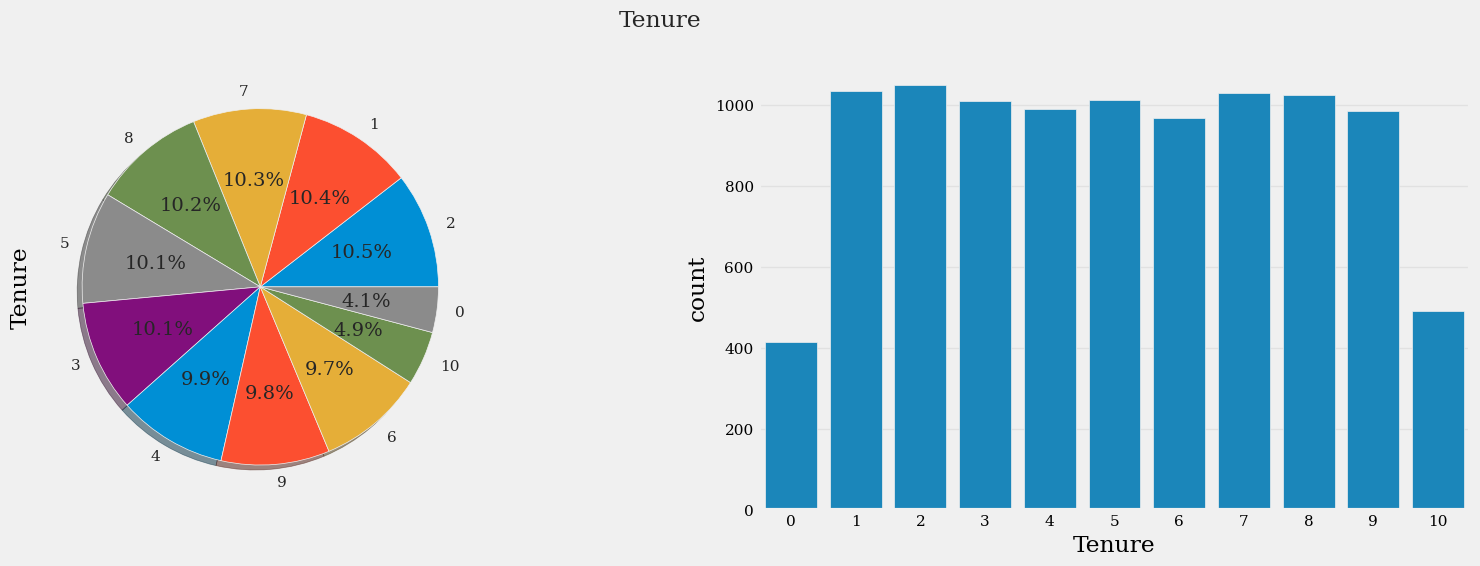

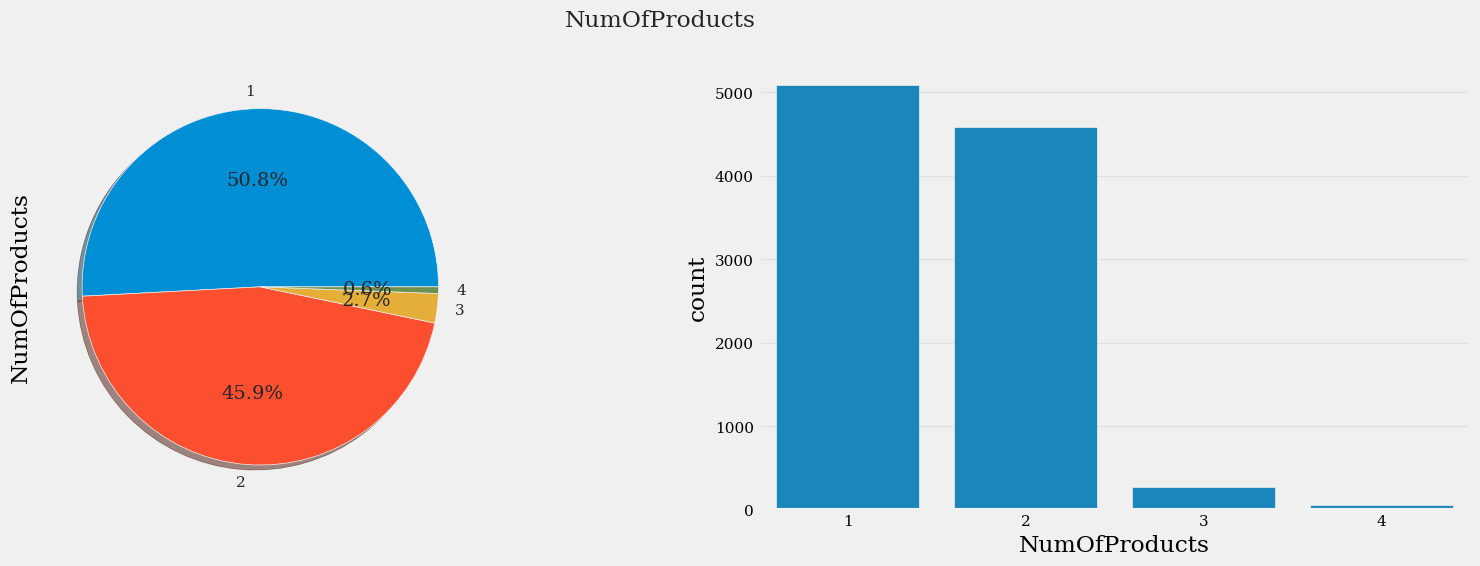

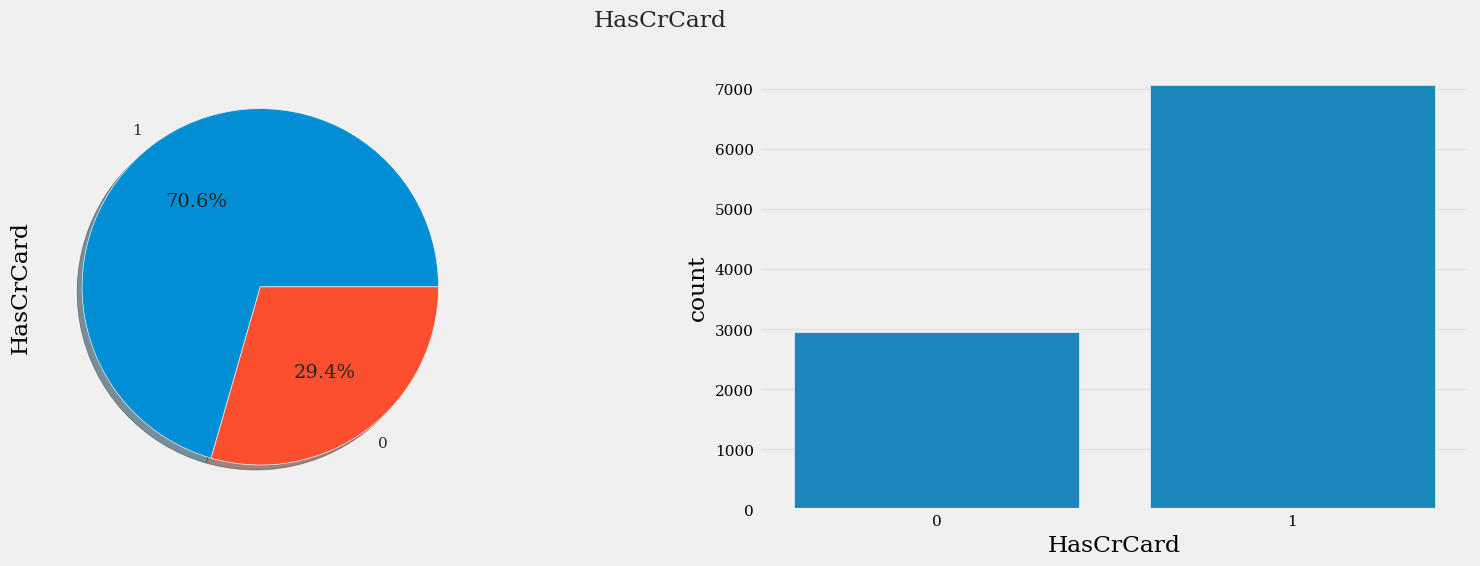

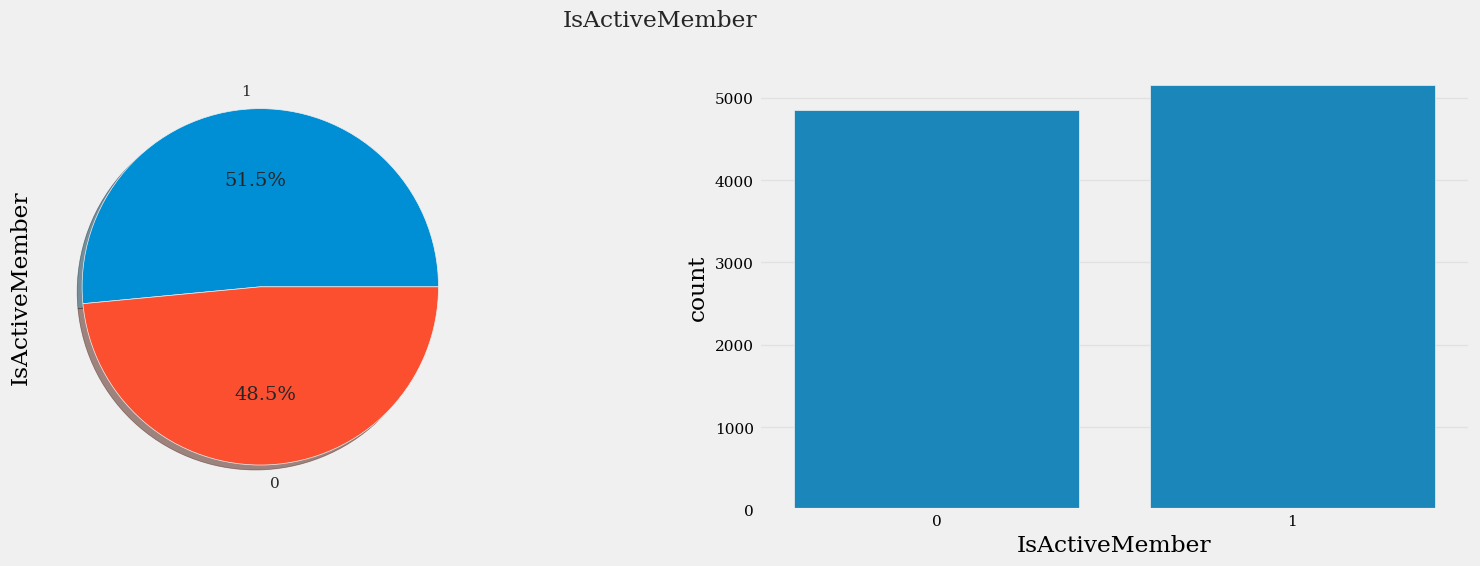

In [16]:
categorical_vars.remove('Exited')

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    train_data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=train_data,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

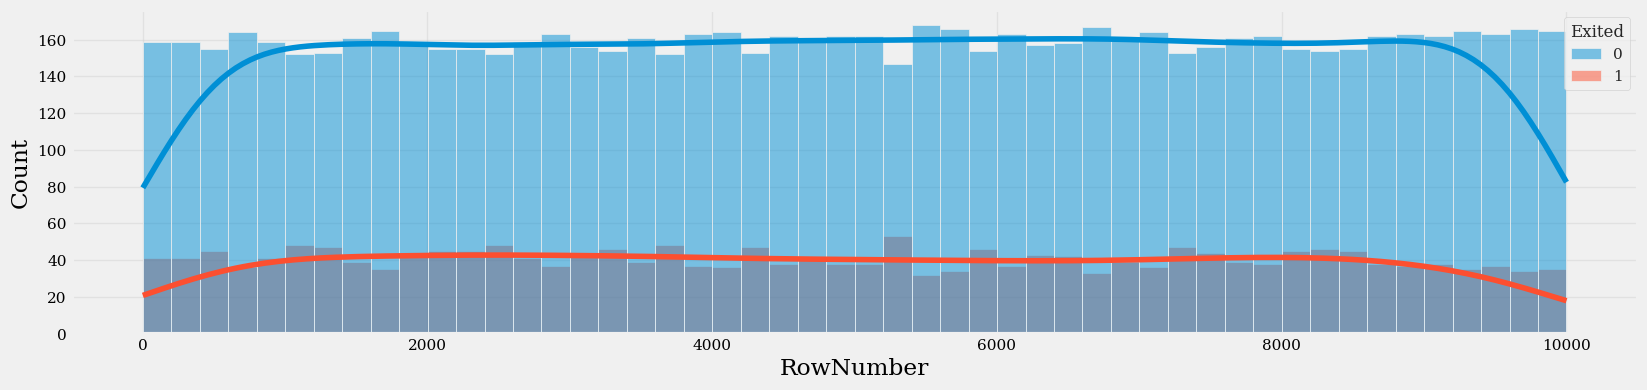

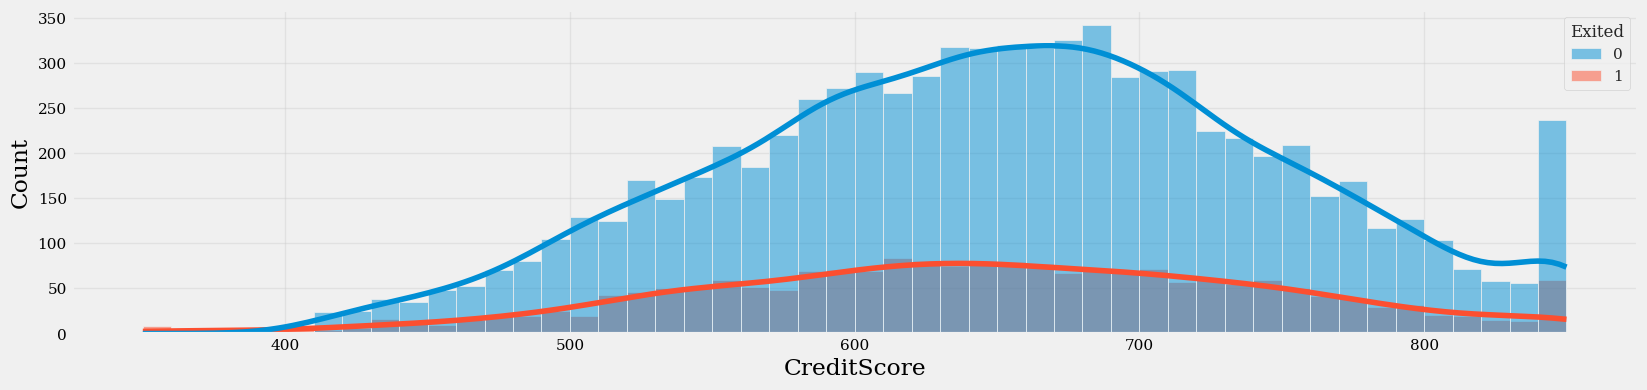

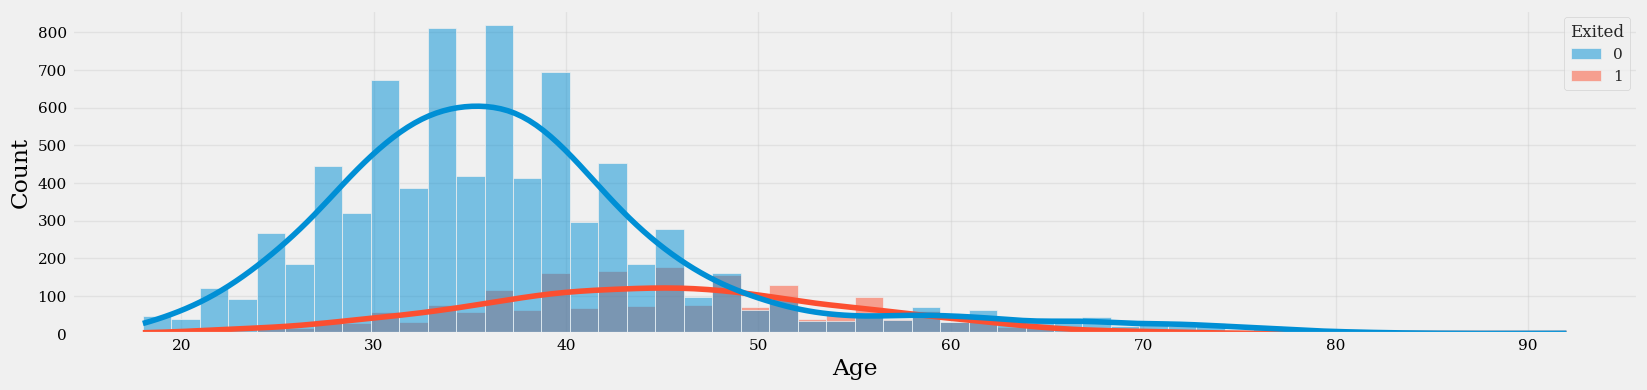

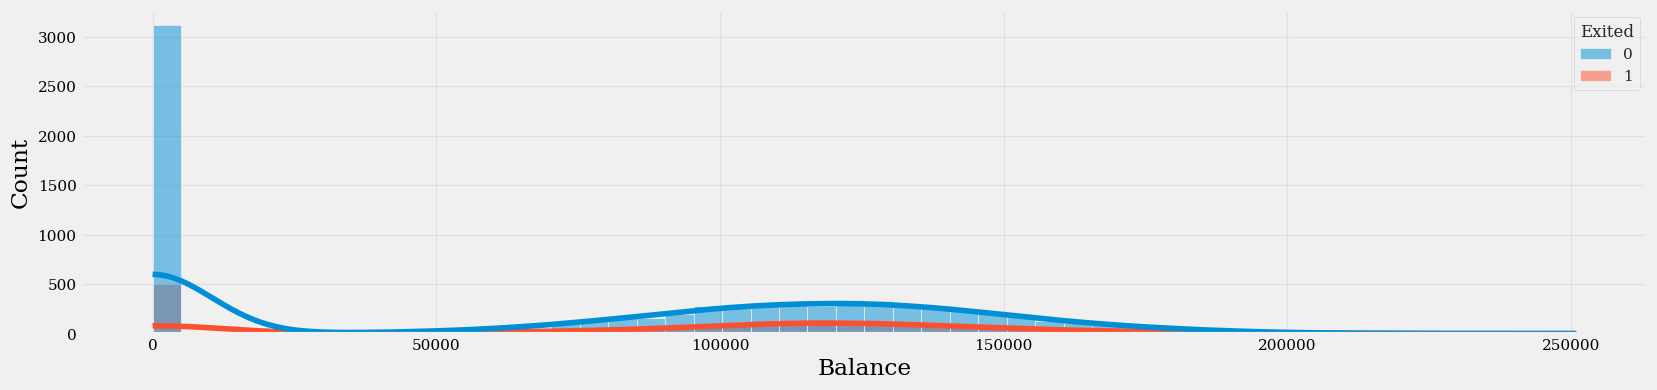

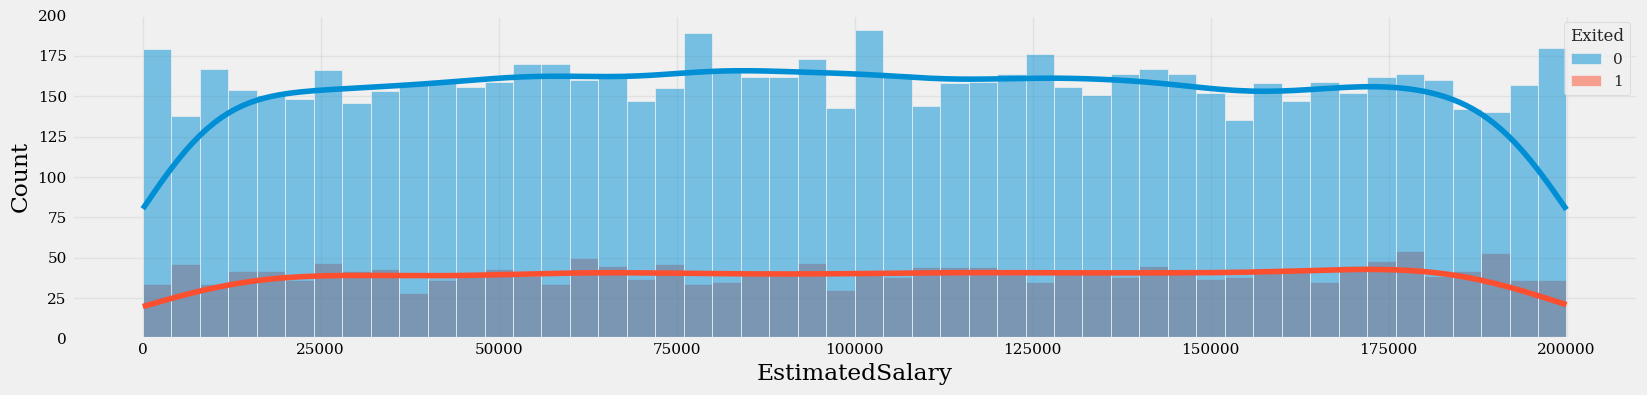

In [17]:
continuous_vars.remove('CustomerId')
continuous_vars.remove('Surname')

for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=train_data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

In [ ]:
df3 = train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()
sns.pairplot(df3, hue="Exited", corner=True)
plt.show()

In [ ]:
df4 = train_data[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary',
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

In [ ]:
X = train_data.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = train_data['Exited']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X_encoded = pd.get_dummies(X, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

X_encoded.head()

In [ ]:
# test_data.head()

test_data = test_data.drop(['id', 'CustomerId', 'Surname'], axis=1)
test_data.head()

X_test_encoded = pd.get_dummies(test_data, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

X_test_encoded.head()

In [ ]:
sum(y)/len(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
sum(y_train)/len(y_train)

In [ ]:
sum(y_test)/len(y_test)

In [ ]:
clf_xgb_v1 = xgb.XGBClassifier(objective='binary:logistic',
                            # missing=None,
                            seed=42)

clf_xgb_v1.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test, y_test)])

In [22]:
pip install xgboost

In [21]:
from xgboost import XGBClassifier

# Create XGBClassifier with default parameters
clf = XGBClassifier()
from xgboost import XGBClassifier

# Create XGBClassifier with custom parameters
clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    objective='binary:logistic'
)


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv("/content/Churn_Modelling.csv")

# Split your dataset into features (X) and labels (y)
X = dataset.drop(columns=['label_column'])
y = dataset['label_column']

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBoost classifier
clf_xgb_v1 = XGBClassifier()

# Fit the classifier to your training data
clf_xgb_v1.fit(X_train, y_train)

# Make predictions on the test data
predictions_1 = clf_xgb_v1.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()


KeyError: "['label_column'] not found in axis"

In [26]:
# # Round 1

# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.05, 0.01, 0.1],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5]
# }

# optimal_parameters = GridSearchCV(
#     estimator=xgb.XGBClassifier(objective='binary:logistic',
#                                 seed=42,
#                                 subsample=0.9,
#                                 colsample_bytree=0.5),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=3,
#     n_jobs=10,
#     cv=3
# )

# optimal_parameters.fit(X_train,
#                        y_train,
#                        early_stopping_rounds=10,
#                        eval_metric='auc',
#                        eval_set=[(X_test, y_test)],
#                        verbose=True)

# print(optimal_parameters)

In [27]:
clf_xgb_v2 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.1,
                               max_depth=5,
                               reg_lambda=10.0,
                               scale_pos_weight=5,
                               subsample=0.9,
                               colsample_bytree=0.5)

clf_xgb_v2.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])

NameError: name 'X_train' is not defined

In [28]:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,

SyntaxError: incomplete input (<ipython-input-28-86f1c8f69e2d>, line 5)

In [29]:
predictions_2 = clf_xgb_v2.predict(X_test)

cm = confusion_matrix(y_test, predictions_2, labels=clf_xgb_v2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()

NameError: name 'X_test' is not defined

In [30]:
clf_xgb_v3 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.1,
                               max_depth=5,
                               reg_lambda=10.0,
                               scale_pos_weight=5,
                               subsample=0.9,
                               colsample_bytree=0.5,
                               n_estimators=1)

clf_xgb_v3.fit(X_train, y_train)

bst = clf_xgb_v3.get_booster()

for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}

leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb_v3, num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

NameError: name 'X_train' is not defined

In [31]:
# sample_submission.head()
sample_submission = sample_submission.drop(['Exited'], axis=1)
sample_submission.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [32]:
submission = clf_xgb_v2.predict_proba(X_test_encoded)[:, 1]
submission

NameError: name 'X_test_encoded' is not defined

In [33]:
sample_submission['Exited'] = submission
sample_submission.head()

NameError: name 'submission' is not defined